In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [2]:
directory = r"D:/Ubuntu_Files/Bright_ML_Project/2016"

data_16=pd.DataFrame()

# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    
    for csv_file_name in os.listdir(file_path):
        csv_file_path=os.path.join(file_path, csv_file_name)
        if os.path.isfile(csv_file_path) and csv_file_name.endswith('.csv'):
            new_data=pd.read_csv(csv_file_path)
            data_16=data_16.append(new_data, ignore_index=True)

columns=data_16.columns
true_col=['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes', 'Origin', 'Dest']
drop_col=[]
for i in columns:
    if i not in true_col:
        drop_col.append(i)

data_16.drop(drop_col, axis=1, inplace=True)

true_airports=['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']
drop_airports=[]

for i in data_16['Origin'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_16=data_16[data_16['Origin']!=i]
    
drop_airports=[]

for i in data_16['Dest'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_16=data_16[data_16['Dest']!=i]
    
#data_16.drop(['Origin', 'Dest'], axis=1, inplace=True)

In [3]:
directory = r"D:/Ubuntu_Files/Bright_ML_Project/2017"

data_17=pd.DataFrame()

# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    
    for csv_file_name in os.listdir(file_path):
        csv_file_path=os.path.join(file_path, csv_file_name)
        if os.path.isfile(csv_file_path) and csv_file_name.endswith('.csv'):
            new_data=pd.read_csv(csv_file_path)
            data_17=data_17.append(new_data, ignore_index=True)

columns=data_17.columns
true_col=['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes' ,'Origin', 'Dest']
drop_col=[]
for i in columns:
    if i not in true_col:
        drop_col.append(i)

data_17.drop(drop_col, axis=1, inplace=True)

true_airports=['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']
drop_airports=[]

for i in data_17['Origin'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_17=data_17[data_17['Origin']!=i]
    
drop_airports=[]

for i in data_17['Dest'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_17=data_17[data_17['Dest']!=i]
    
#data_17.drop(['Origin', 'Dest'], axis=1, inplace=True)

In [4]:
data_16

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
57,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,745,741.0,0.0,0.0,1602,1610.0,8.0,0.0
58,2016,1,1,2,2016-01-02,14747,SEA,12478,JFK,745,737.0,0.0,0.0,1602,1613.0,11.0,0.0
59,2016,1,1,3,2016-01-03,14747,SEA,12478,JFK,745,743.0,0.0,0.0,1602,1547.0,0.0,0.0
60,2016,1,1,4,2016-01-04,14747,SEA,12478,JFK,745,737.0,0.0,0.0,1602,1551.0,0.0,0.0
61,2016,1,1,5,2016-01-05,14747,SEA,12478,JFK,710,708.0,0.0,0.0,1527,1524.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617647,2016,3,9,1,2016-09-01,13930,ORD,14107,PHX,1555,1556.0,1.0,0.0,1748,1736.0,0.0,0.0
5617648,2016,3,9,1,2016-09-01,13204,MCO,11618,EWR,755,756.0,1.0,0.0,1033,1028.0,0.0,0.0
5617650,2016,3,9,1,2016-09-01,12266,IAH,12889,LAS,915,913.0,0.0,0.0,1031,1021.0,0.0,0.0
5617653,2016,3,9,1,2016-09-01,11618,EWR,12266,IAH,630,622.0,0.0,0.0,910,854.0,0.0,0.0


In [5]:
data_17

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
0,2017,1,1,17,2017-01-17,11057,CLT,14107,PHX,1619,1616.0,0.0,0.0,1856,1842.0,0.0,0.0
1,2017,1,1,18,2017-01-18,11057,CLT,14107,PHX,1619,1614.0,0.0,0.0,1856,1821.0,0.0,0.0
2,2017,1,1,19,2017-01-19,11057,CLT,14107,PHX,1619,1611.0,0.0,0.0,1856,1826.0,0.0,0.0
3,2017,1,1,20,2017-01-20,11057,CLT,14107,PHX,1619,1656.0,37.0,1.0,1856,1929.0,33.0,1.0
4,2017,1,1,21,2017-01-21,11057,CLT,14107,PHX,1619,1632.0,13.0,0.0,1856,1858.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674578,2017,3,9,25,2017-09-25,14771,SFO,12478,JFK,2045,2038.0,0.0,0.0,522,449.0,0.0,0.0
5674581,2017,3,9,25,2017-09-25,11618,EWR,13204,MCO,1205,1200.0,0.0,0.0,1449,1428.0,0.0,0.0
5674582,2017,3,9,25,2017-09-25,13204,MCO,11618,EWR,1141,1143.0,2.0,0.0,1417,1409.0,0.0,0.0
5674589,2017,3,9,25,2017-09-25,12889,LAS,12478,JFK,2159,2157.0,0.0,0.0,557,540.0,0.0,0.0


In [6]:
flight_data=pd.DataFrame()

flight_data=flight_data.append(data_16, ignore_index=True)
flight_data=flight_data.append(data_17, ignore_index=True)

flight_data

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
0,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,745,741.0,0.0,0.0,1602,1610.0,8.0,0.0
1,2016,1,1,2,2016-01-02,14747,SEA,12478,JFK,745,737.0,0.0,0.0,1602,1613.0,11.0,0.0
2,2016,1,1,3,2016-01-03,14747,SEA,12478,JFK,745,743.0,0.0,0.0,1602,1547.0,0.0,0.0
3,2016,1,1,4,2016-01-04,14747,SEA,12478,JFK,745,737.0,0.0,0.0,1602,1551.0,0.0,0.0
4,2016,1,1,5,2016-01-05,14747,SEA,12478,JFK,710,708.0,0.0,0.0,1527,1524.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2017,3,9,25,2017-09-25,14771,SFO,12478,JFK,2045,2038.0,0.0,0.0,522,449.0,0.0,0.0
1877292,2017,3,9,25,2017-09-25,11618,EWR,13204,MCO,1205,1200.0,0.0,0.0,1449,1428.0,0.0,0.0
1877293,2017,3,9,25,2017-09-25,13204,MCO,11618,EWR,1141,1143.0,2.0,0.0,1417,1409.0,0.0,0.0
1877294,2017,3,9,25,2017-09-25,12889,LAS,12478,JFK,2159,2157.0,0.0,0.0,557,540.0,0.0,0.0


In [7]:
#Year, Quarter, Month, OriginAirportID, DestAirportID, DepDel15, ArrDel15, CRSDEP, CRSARR
len(flight_data['OriginAirportID'].unique())

15

In [8]:
del data_16
del data_17

gc.collect()

0

In [ ]:
directory=r"C:\Users\Aditya Somasundaram\OneDrive\Desktop\Bright_ML_Project\Airports"

weather=pd.DataFrame()

# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    
    for json_file_name in os.listdir(file_path):
        json_file_path=os.path.join(file_path, json_file_name)
        if os.path.isfile(json_file_path) and json_file_name.endswith('.json'):
            if json_file_name[:4]=='2016' or json_file_name[:4]=='2017':
                year=json_file_name[:4]
                
                if len(json_file_name)==11:                    
                    month='0'+json_file_name[5]                    
                else:                    
                    month=json_file_name[5:7]
                
                count=0
                
                sample=pd.read_json(json_file_path)
                
                for i in sample['data']['weather']:
                    for j in i['hourly']:
                        
                        j['Origin']= filename
                        
                        if j['time']!='0':
                            if count<10:
                                j['date']= year + '-'+ month + '-' + '0' + str(count)
                            else:
                                j['date']= year + '-'+ month + '-' + str(count)
        
                        else:
                            count+=1
                            if count<10:
                                j['date']= year + '-'+ month + '-' + '0' + str(count)
                            else:
                                j['date']= year + '-'+ month + '-' + str(count)
                
                for i in sample['data']['weather']:
                    for j in i['hourly']:
                        weather=weather.append(j, ignore_index=True)       

In [9]:
weather=pd.read_csv(r"D:/Ubuntu_Files/Bright_ML_Project/weather_raw.csv")

true_col=['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date', 'time', 'airport' ,'Origin']
del_col=[]

for i in weather.columns:
    if i not in true_col:
        del_col.append(i)
        
weather.drop(del_col, axis=1, inplace=True)
weather

,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,time,Origin,date
0,11,47,100,0.1,1023,17,10,176,49,46,318,91,0,ATL,2016-01-01
1,13,44,100,0.0,1023,22,10,176,46,42,317,92,100,ATL,2016-01-01
2,14,41,100,0.0,1023,26,10,122,43,38,315,92,200,ATL,2016-01-01
3,16,38,100,0.0,1023,30,10,122,40,33,314,93,300,ATL,2016-01-01
4,17,38,100,0.0,1023,30,10,122,40,33,314,93,400,ATL,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,26,57,0,0.0,1014,27,10,113,67,67,296,70,1900,SFO,2017-09-30
263156,26,58,0,0.0,1014,27,10,113,67,67,298,71,2000,SFO,2017-09-30
263157,26,58,0,0.0,1014,27,10,113,67,67,300,73,2100,SFO,2017-09-30
263158,23,58,0,0.0,1014,25,10,113,66,66,302,74,2200,SFO,2017-09-30


In [10]:
weather.rename(columns={'time': 'CRSDepTime'}, inplace=True)
weather.rename(columns={'date': 'FlightDate'}, inplace=True)
weather_new=weather.copy()

In [11]:
del weather

gc.collect()

0

In [12]:
weather_new.dtypes

windspeedKmph      int64
DewPointF          int64
cloudcover         int64
precipMM         float64
pressure           int64
WindGustKmph       int64
visibility         int64
weatherCode        int64
tempF              int64
WindChillF         int64
winddirDegree      int64
humidity           int64
CRSDepTime         int64
Origin            object
FlightDate        object
dtype: object

In [13]:
weather_new.dtypes

windspeedKmph      int64
DewPointF          int64
cloudcover         int64
precipMM         float64
pressure           int64
WindGustKmph       int64
visibility         int64
weatherCode        int64
tempF              int64
WindChillF         int64
winddirDegree      int64
humidity           int64
CRSDepTime         int64
Origin            object
FlightDate        object
dtype: object

In [14]:
def round_time(time):
    hour = time//100
    minute = time%100
    
    if minute >= 30:
        hour += 1
    
    return hour*100

flight_data['CRSDepTime'] = flight_data['CRSDepTime'].apply(round_time)
flight_data['CRSArrTime'] = flight_data['CRSArrTime'].apply(round_time)

In [15]:
weather_new

,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,CRSDepTime,Origin,FlightDate
0,11,47,100,0.1,1023,17,10,176,49,46,318,91,0,ATL,2016-01-01
1,13,44,100,0.0,1023,22,10,176,46,42,317,92,100,ATL,2016-01-01
2,14,41,100,0.0,1023,26,10,122,43,38,315,92,200,ATL,2016-01-01
3,16,38,100,0.0,1023,30,10,122,40,33,314,93,300,ATL,2016-01-01
4,17,38,100,0.0,1023,30,10,122,40,33,314,93,400,ATL,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,26,57,0,0.0,1014,27,10,113,67,67,296,70,1900,SFO,2017-09-30
263156,26,58,0,0.0,1014,27,10,113,67,67,298,71,2000,SFO,2017-09-30
263157,26,58,0,0.0,1014,27,10,113,67,67,300,73,2100,SFO,2017-09-30
263158,23,58,0,0.0,1014,25,10,113,66,66,302,74,2200,SFO,2017-09-30


In [16]:
merged_data=pd.merge(flight_data, weather_new, on=['CRSDepTime', 'Origin', 'FlightDate'], how='inner')

In [17]:
del weather_new
del flight_data

gc.collect()

0

In [18]:
merged_data = merged_data.dropna(subset=['DepTime', 'DepDelayMinutes', 'DepDel15'])
merged_data

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
0,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,800,...,0,0.0,1030,8,10,113,34,29,108,65
1,2016,1,1,1,2016-01-01,14747,SEA,14107,PHX,800,...,0,0.0,1030,8,10,113,34,29,108,65
2,2016,1,1,1,2016-01-01,14747,SEA,11292,DEN,800,...,0,0.0,1030,8,10,113,34,29,108,65
3,2016,1,1,1,2016-01-01,14747,SEA,12266,IAH,800,...,0,0.0,1030,8,10,113,34,29,108,65
4,2016,1,1,1,2016-01-01,14747,SEA,10397,ATL,800,...,0,0.0,1030,8,10,113,34,29,108,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857882,2017,3,9,23,2017-09-23,12478,JFK,13204,MCO,2100,...,0,0.0,1017,15,10,113,86,86,1,55
1857883,2017,3,9,23,2017-09-23,12478,JFK,12892,LAX,2200,...,0,0.0,1017,14,10,113,84,84,41,58
1857884,2017,3,9,24,2017-09-24,13204,MCO,11618,EWR,2200,...,5,0.0,1012,15,10,113,81,81,44,78
1857885,2017,3,9,24,2017-09-24,12478,JFK,12892,LAX,2200,...,14,0.0,1017,10,10,113,74,74,192,87


In [19]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [20]:
#Year, Quarter, Month, DayofMonth, OriginAirportID, DestAirportID,Origin, DepDel15,  CRSDEP, CRSARR, visibility
len(merged_data['weatherCode'].unique())

43

In [21]:
merged_data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'windspeedKmph', 'DewPointF',
       'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility',
       'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity'],
      dtype='object')

In [22]:
merged_new = pd.get_dummies(merged_data, columns=['Year', 'Quarter', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID', 'Origin', 'CRSDepTime', 'CRSArrTime', 'visibility', 'weatherCode'])

In [23]:
merged_new.drop(['DepTime', 'DepDelayMinutes' ,'ArrTime', 'ArrDelayMinutes', 'ArrDel15' ,'FlightDate', 'Dest'], axis=1, inplace=True)
merged_new


,DepDel15,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,tempF,WindChillF,winddirDegree,...,weatherCode_353,weatherCode_356,weatherCode_359,weatherCode_362,weatherCode_365,weatherCode_368,weatherCode_371,weatherCode_386,weatherCode_389,weatherCode_395
0,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
1,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
2,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
3,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
4,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857882,0.0,12,68,0,0.0,1017,15,86,86,1,...,0,0,0,0,0,0,0,0,0,0
1857883,0.0,11,67,0,0.0,1017,14,84,84,41,...,0,0,0,0,0,0,0,0,0,0
1857884,1.0,12,73,5,0.0,1012,15,81,81,44,...,0,0,0,0,0,0,0,0,0,0
1857885,1.0,3,70,14,0.0,1017,10,74,74,192,...,0,0,0,0,0,0,0,0,0,0


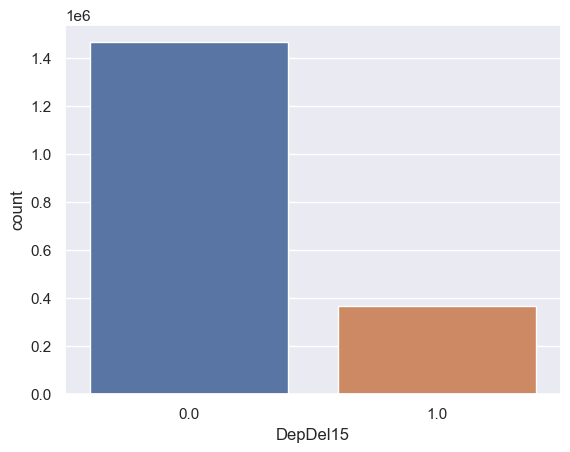

In [24]:
X = merged_new.drop('DepDel15', axis=1)
y = merged_new['DepDel15']

sb.countplot(data=pd.DataFrame(y), x='DepDel15')
plt.show()

In [25]:
del merged_new

gc.collect()

2853

In [26]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)



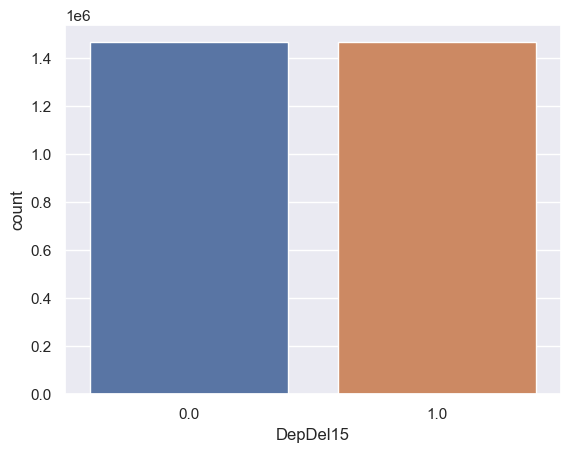

In [27]:
sb.countplot(data=pd.DataFrame(y), x='DepDel15')
plt.show()

In [28]:
scaler = StandardScaler()

X = scaler.fit_transform(X)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [119]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50 ,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=5, verbose=2)

search.fit(X_train, y_train)

best_params = search.best_params_
best_estimator = search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 28990
max_resources_: 2348240
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 28990
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 86970
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 260910
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 782730
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 2348190
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best estimator found:  RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=200,

For Training Data:
Accuracy: 0.9644733928388921
Precision: 0.9901634539044525
Recall: 0.9382435734465684
F1-Score: 0.9635045756534726
For Test Data:
Accuracy: 0.8798095594998807
Precision: 0.9319826562542305
Recall: 0.819770962759334
F1-Score: 0.8722828497112024


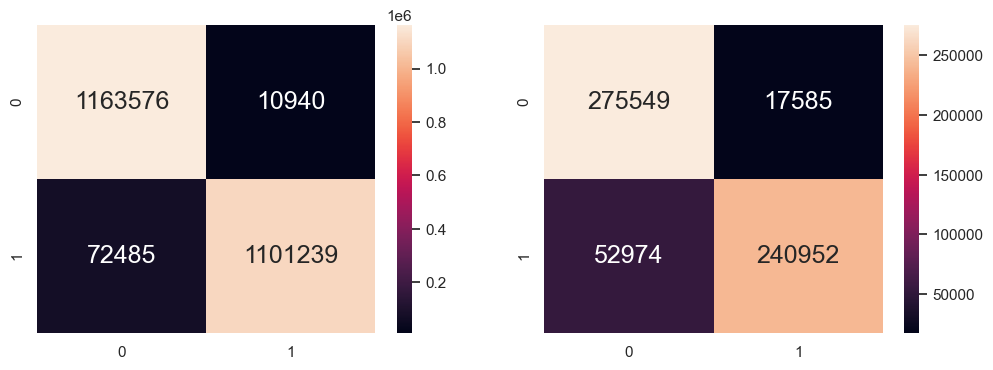

In [120]:
joblib.dump(search, 'D:/Ubuntu_Files/Bright_ML_Project/models/rf_new_model.joblib')

rf_y_train_pred = search.predict(X_train)

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, rf_y_train_pred))
print('Precision:', precision_score(y_train, rf_y_train_pred))
print('Recall:', recall_score(y_train, rf_y_train_pred))
print('F1-Score:', f1_score(y_train, rf_y_train_pred))

rf_train_acc=accuracy_score(y_train, rf_y_train_pred)
rf_train_pre=precision_score(y_train, rf_y_train_pred)
rf_train_rec=recall_score(y_train, rf_y_train_pred)
rf_train_f1=f1_score(y_train, rf_y_train_pred)


rf_y_test_pred = search.predict(X_test)

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred))
print('Recall:', recall_score(y_test, rf_y_test_pred))
print('F1-Score:', f1_score(y_test, rf_y_test_pred))

rf_test_acc=accuracy_score(y_train, rf_y_train_pred)
rf_test_pre=precision_score(y_train, rf_y_train_pred)
rf_test_rec=recall_score(y_train, rf_y_train_pred)
rf_test_f1=f1_score(y_train, rf_y_train_pred)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [113]:
logistic = LogisticRegression(max_iter=1000)  

best_model = logistic.fit(X_train, y_train)

For Training Data:
Accuracy: 0.8642140496712432
Precision: 0.9897789175277814
Recall: 0.7359362166914879
F1-Score: 0.8441881715963898
For Test Data:
Accuracy: 0.8645930569277416
Precision: 0.9897139829540783
Recall: 0.7372127678395243
F1-Score: 0.8450037436825357


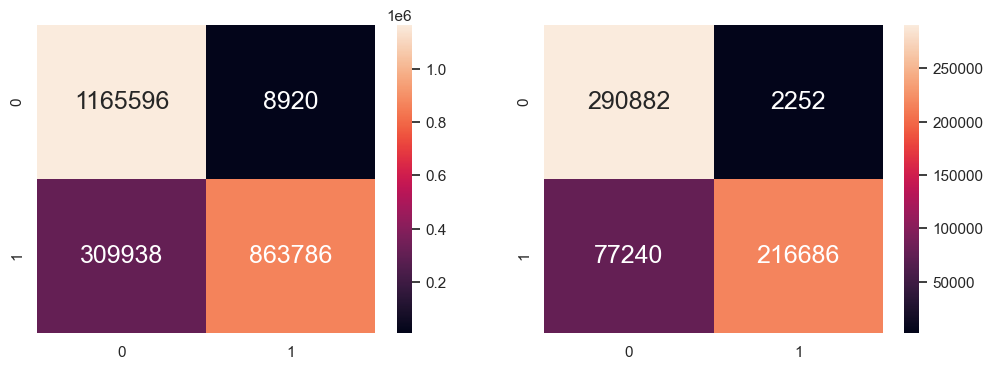

In [114]:
joblib.dump(best_model, 'D:/Ubuntu_Files/Bright_ML_Project/models/logreg_new_model.joblib')

log_y_train_pred = best_model.predict(X_train)

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, log_y_train_pred))
print('Precision:', precision_score(y_train, log_y_train_pred))
print('Recall:', recall_score(y_train, log_y_train_pred))
print('F1-Score:', f1_score(y_train, log_y_train_pred))

log_train_acc=accuracy_score(y_train, log_y_train_pred)
log_train_pre=precision_score(y_train, log_y_train_pred)
log_train_rec=recall_score(y_train, log_y_train_pred)
log_train_f1=f1_score(y_train, log_y_train_pred)


log_y_test_pred = best_model.predict(X_test)

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, log_y_test_pred))
print('Precision:', precision_score(y_test, log_y_test_pred))
print('Recall:', recall_score(y_test, log_y_test_pred))
print('F1-Score:', f1_score(y_test, log_y_test_pred))

log_test_acc=accuracy_score(y_train, log_y_train_pred)
log_test_pre=precision_score(y_train, log_y_train_pred)
log_test_rec=recall_score(y_train, log_y_train_pred)
log_test_f1=f1_score(y_train, log_y_train_pred)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, log_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, log_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [116]:
del logistic
del best_model
del log_y_train_pred
del log_y_test_pred

gc.collect()

13489

In [121]:
xgb = XGBClassifier(eval_metric='logloss') 
parameters = {
    'n_estimators': [200],
    'max_depth': [18],
    'learning_rate': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [1],
}

hgs = HalvingGridSearchCV(xgb, parameters, cv=5, scoring='f1', verbose=2)

best_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_model.best_params_)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 2348240
max_resources_: 2348240
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 2348240
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=200, subsample=0.7; total time=21.9min
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=200, subsample=0.7; total time=20.4min
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=200, subsample=0.7; total time=20.2min
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=200, subsample=0.7; total time=20.2min
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=18, n_estimators=200, subsample=0.7; total time=20.1min
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 18, 'n_estimators': 200, 'subsample': 0.7}


For Training Data:
Accuracy: 0.9137030286512452
Precision: 0.9854137632490817
Recall: 0.8397783465278038
F1-Score: 0.9067857967545269
For Test Data:
Accuracy: 0.8817974312676728
Precision: 0.9588844562889328
Recall: 0.7981362655906589
F1-Score: 0.8711570097553185


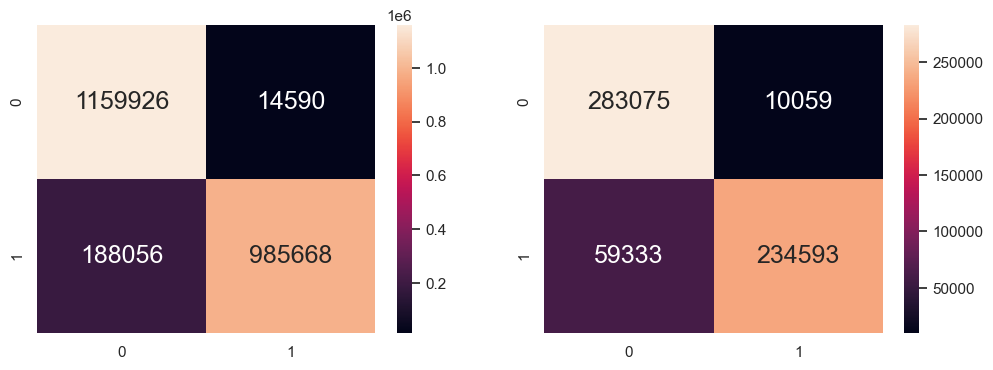

In [122]:
joblib.dump(best_model, 'D:/Ubuntu_Files/Bright_ML_Project/models/xgb_new_model.joblib')

xgb_y_train_pred = best_model.predict(X_train)

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, xgb_y_train_pred))
print('Precision:', precision_score(y_train, xgb_y_train_pred))
print('Recall:', recall_score(y_train, xgb_y_train_pred))
print('F1-Score:', f1_score(y_train, xgb_y_train_pred))

xgb_train_acc=accuracy_score(y_train, xgb_y_train_pred)
xgb_train_pre=precision_score(y_train, xgb_y_train_pred)
xgb_train_rec=recall_score(y_train, xgb_y_train_pred)
xgb_train_f1=f1_score(y_train, xgb_y_train_pred)


xgb_y_test_pred = best_model.predict(X_test)

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, xgb_y_test_pred))
print('Precision:', precision_score(y_test, xgb_y_test_pred))
print('Recall:', recall_score(y_test, xgb_y_test_pred))
print('F1-Score:', f1_score(y_test, xgb_y_test_pred))

xgb_test_acc=accuracy_score(y_train, xgb_y_train_pred)
xgb_test_pre=precision_score(y_train, xgb_y_train_pred)
xgb_test_rec=recall_score(y_train, xgb_y_train_pred)
xgb_test_f1=f1_score(y_train, xgb_y_train_pred)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, xgb_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, xgb_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [123]:
del xgb
del hgs
del best_model
del xgb_y_test_pred
del xgb_y_train_pred

gc.collect()

24587

In [30]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 9663
max_resources_: 2348240
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 648
n_resources: 9663
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_

For Training Data:
Accuracy: 0.8665805028446837
Precision: 0.9804486524456774
Recall: 0.7479867498662377
F1-Score: 0.8485854894810021
For Test Data:
Accuracy: 0.8666899465131332
Precision: 0.979901823344326
Recall: 0.7491035158509285
F1-Score: 0.8490984780852373


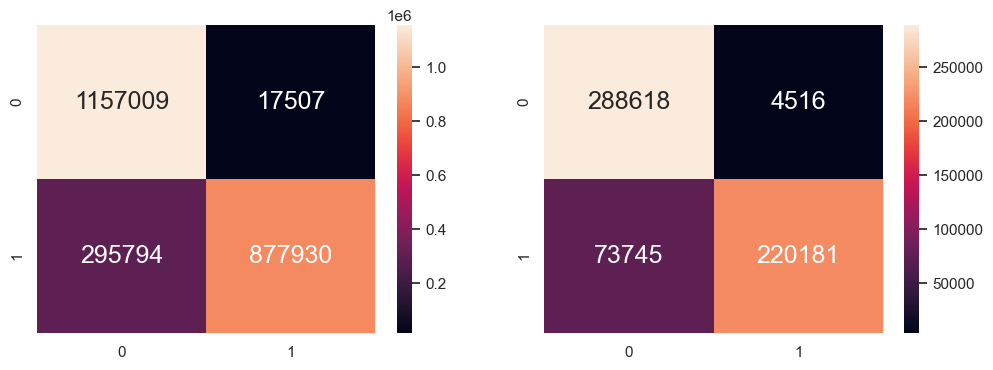

In [31]:
joblib.dump(best_lgm_model, 'D:/Ubuntu_Files/Bright_ML_Project/models/lgm_new_model.joblib')

lgm_y_train_pred = best_lgm_model.predict(X_train)

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgm_y_train_pred))
print('Precision:', precision_score(y_train, lgm_y_train_pred))
print('Recall:', recall_score(y_train, lgm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgm_y_train_pred))

lgm_train_acc=accuracy_score(y_train, lgm_y_train_pred)
lgm_train_pre=precision_score(y_train, lgm_y_train_pred)
lgm_train_rec=recall_score(y_train, lgm_y_train_pred)
lgm_train_f1=f1_score(y_train, lgm_y_train_pred)


lgm_y_test_pred = best_lgm_model.predict(X_test)

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgm_y_test_pred))
print('Precision:', precision_score(y_test, lgm_y_test_pred))
print('Recall:', recall_score(y_test, lgm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgm_y_test_pred))

lgm_test_acc=accuracy_score(y_train, lgm_y_train_pred)
lgm_test_pre=precision_score(y_train, lgm_y_train_pred)
lgm_test_rec=recall_score(y_train, lgm_y_train_pred)
lgm_test_f1=f1_score(y_train, lgm_y_train_pred)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [36]:
et = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = HalvingGridSearchCV(estimator=et, param_grid=param_grid, cv=5, verbose=2, n_jobs=2, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 28990
max_resources_: 2348240
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 28990
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 1
n_candidates: 72
n_resources: 86970
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 2
n_candidates: 24
n_resources: 260910
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 3
n_candidates: 8
n_resources: 782730
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 3
n_resources: 2348190
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator found:  ExtraTreesClassifier(bootstrap=True, n_estimators=200)


For Training Data:
Accuracy: 0.9793006677341328
Precision: 0.9895495307339869
Recall: 0.9688189046147135
F1-Score: 0.9790744939748819
For Test Data:
Accuracy: 0.8750621742240997
Precision: 0.9284804077731762
Recall: 0.8130924110150174
F1-Score: 0.8669638905616298


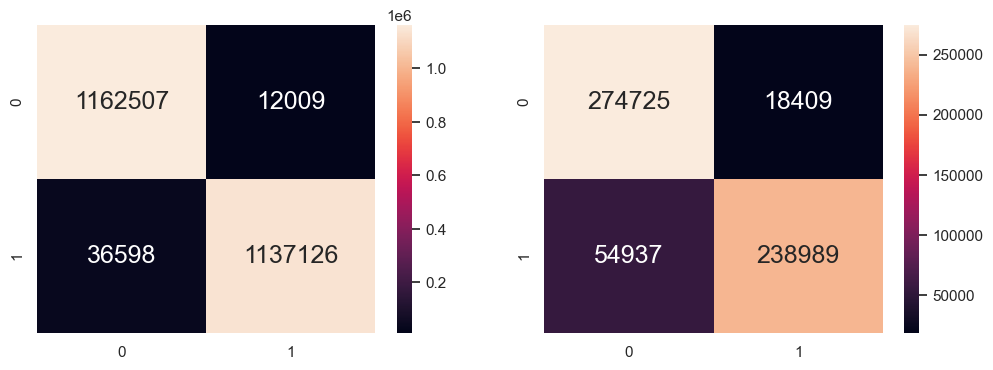

In [37]:
joblib.dump(grid_search, 'D:/Ubuntu_Files/Bright_ML_Project/models/et_new_model.joblib')

et_y_train_pred = grid_search.predict(X_train)

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, et_y_train_pred))
print('Precision:', precision_score(y_train, et_y_train_pred))
print('Recall:', recall_score(y_train, et_y_train_pred))
print('F1-Score:', f1_score(y_train, et_y_train_pred))

et_train_acc=accuracy_score(y_train, et_y_train_pred)
et_train_pre=precision_score(y_train, et_y_train_pred)
et_train_rec=recall_score(y_train, et_y_train_pred)
et_train_f1=f1_score(y_train, et_y_train_pred)


et_y_test_pred = grid_search.predict(X_test)

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, et_y_test_pred))
print('Precision:', precision_score(y_test, et_y_test_pred))
print('Recall:', recall_score(y_test, et_y_test_pred))
print('F1-Score:', f1_score(y_test, et_y_test_pred))

et_test_acc=accuracy_score(y_train, et_y_train_pred)
et_test_pre=precision_score(y_train, et_y_train_pred)
et_test_rec=recall_score(y_train, et_y_train_pred)
et_test_f1=f1_score(y_train, et_y_train_pred)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, et_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, et_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [38]:
del et
del grid_search
del et_y_test_pred
del et_y_train_pred

gc.collect()

12992

In [32]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=5, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 86971
max_resources_: 2348240
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 86971
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 260913
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 782739
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 2348217
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best estimator found:  DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5)


For Training Data:
Accuracy: 0.9304674990631281
Precision: 0.9580344199531651
Recall: 0.9003258006141137
F1-Score: 0.928284082508948
For Test Data:
Accuracy: 0.8436582291418254
Precision: 0.8608709002492163
Recall: 0.820311915243973
F1-Score: 0.8401021595668323


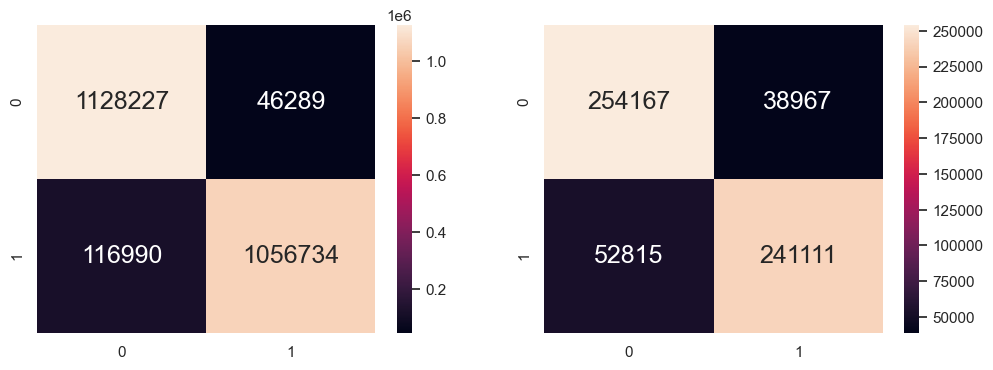

In [33]:
joblib.dump(grid_search, 'D:/Ubuntu_Files/Bright_ML_Project/models/dt_new_model.joblib')

dt_y_train_pred = grid_search.predict(X_train)

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

dt_train_acc=accuracy_score(y_train, dt_y_train_pred)
dt_train_pre=precision_score(y_train, dt_y_train_pred)
dt_train_rec=recall_score(y_train, dt_y_train_pred)
dt_train_f1=f1_score(y_train, dt_y_train_pred)


dt_y_test_pred = grid_search.predict(X_test)

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

dt_test_acc=accuracy_score(y_train, dt_y_train_pred)
dt_test_pre=precision_score(y_train, dt_y_train_pred)
dt_test_rec=recall_score(y_train, dt_y_train_pred)
dt_test_f1=f1_score(y_train, dt_y_train_pred)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

Implementing the models on the flight data

In [30]:
rf = joblib.load('D:/Ubuntu_Files/Bright_ML_Project/models/rf_new_model.joblib')
log = joblib.load('D:/Ubuntu_Files/Bright_ML_Project/models/logreg_new_model.joblib')
xgb = joblib.load('D:/Ubuntu_Files/Bright_ML_Project/models/xgb_new_model.joblib')
lgm = joblib.load('D:/Ubuntu_Files/Bright_ML_Project/models/lgm_new_model.joblib')
et = joblib.load('D:/Ubuntu_Files/Bright_ML_Project/models/et_new_model.joblib')
dt = joblib.load('D:/Ubuntu_Files/Bright_ML_Project/models/dt_new_model.joblib')

Accuracy: 0.9475406261710898
Precision: 0.9791897081525276
Recall: 0.914517085136102
F1-Score: 0.9457490683019738


<Axes: >

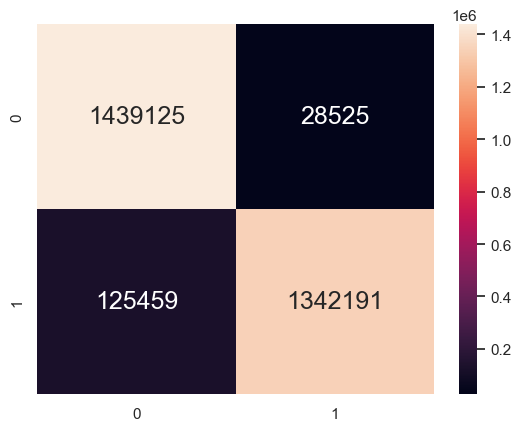

In [31]:
rf_pred=rf.predict(X)

print('Accuracy:', accuracy_score(y, rf_pred))
print('Precision:', precision_score(y, rf_pred))
print('Recall:', recall_score(y, rf_pred))
print('F1-Score:', f1_score(y, rf_pred))

rf_acc=accuracy_score(y, rf_pred)
rf_pre=precision_score(y, rf_pred)
rf_rec=recall_score(y, rf_pred)
rf_f1=f1_score(y, rf_pred)

fig, ax = plt.subplots()
sb.heatmap(confusion_matrix(y, rf_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=ax)


Accuracy: 0.8642898511225429
Precision: 0.9897658943758222
Recall: 0.7361918713589752
F1-Score: 0.8443516063414364


<Axes: >

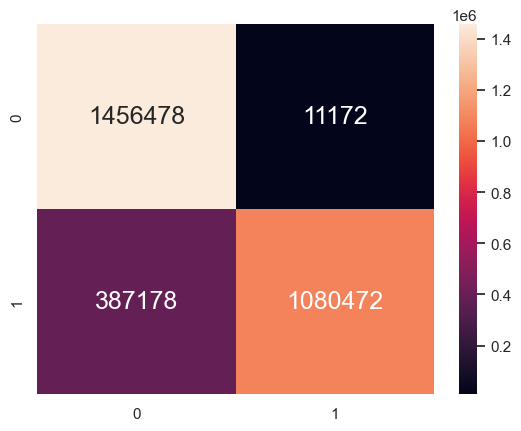

In [32]:
log_pred=log.predict(X)

print('Accuracy:', accuracy_score(y, log_pred))
print('Precision:', precision_score(y, log_pred))
print('Recall:', recall_score(y, log_pred))
print('F1-Score:', f1_score(y, log_pred))

log_acc=accuracy_score(y, log_pred)
log_pre=precision_score(y, log_pred)
log_rec=recall_score(y, log_pred)
log_f1=f1_score(y, log_pred)

fig, ax = plt.subplots()
sb.heatmap(confusion_matrix(y, log_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=ax)


Accuracy: 0.9073219091745307
Precision: 0.9802001751130603
Recall: 0.8314386945116342
F1-Score: 0.899711711446014


<Axes: >

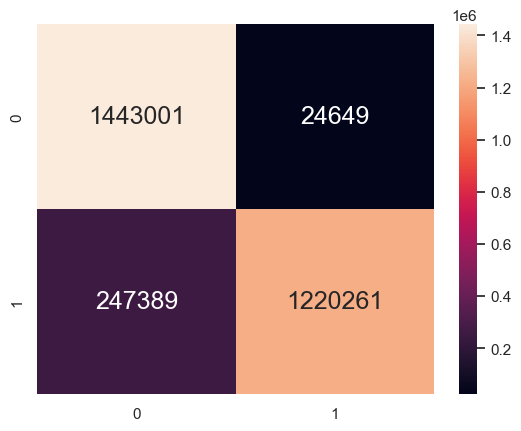

In [33]:
xgb_pred=xgb.predict(X)

print('Accuracy:', accuracy_score(y, xgb_pred))
print('Precision:', precision_score(y, xgb_pred))
print('Recall:', recall_score(y, xgb_pred))
print('F1-Score:', f1_score(y, xgb_pred))

xgb_acc=accuracy_score(y, xgb_pred)
xgb_pre=precision_score(y, xgb_pred)
xgb_rec=recall_score(y, xgb_pred)
xgb_f1=f1_score(y, xgb_pred)

fig, ax = plt.subplots()
sb.heatmap(confusion_matrix(y, xgb_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

Accuracy: 0.8666023915783736
Precision: 0.9803389594459234
Recall: 0.7482104043879672
F1-Score: 0.8486882985596942


<Axes: >

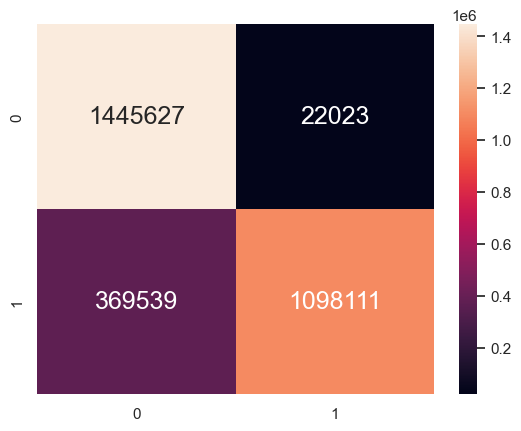

In [34]:
lgm_pred=lgm.predict(X)

print('Accuracy:', accuracy_score(y, lgm_pred))
print('Precision:', precision_score(y, lgm_pred))
print('Recall:', recall_score(y, lgm_pred))
print('F1-Score:', f1_score(y, lgm_pred))

lgm_acc=accuracy_score(y, lgm_pred)
lgm_pre=precision_score(y, lgm_pred)
lgm_rec=recall_score(y, lgm_pred)
lgm_f1=f1_score(y, lgm_pred)

fig, ax = plt.subplots()
sb.heatmap(confusion_matrix(y, lgm_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

Accuracy: 0.9584529690321262
Precision: 0.9783737743799825
Recall: 0.9376315879126494
F1-Score: 0.9575695075783274


<Axes: >

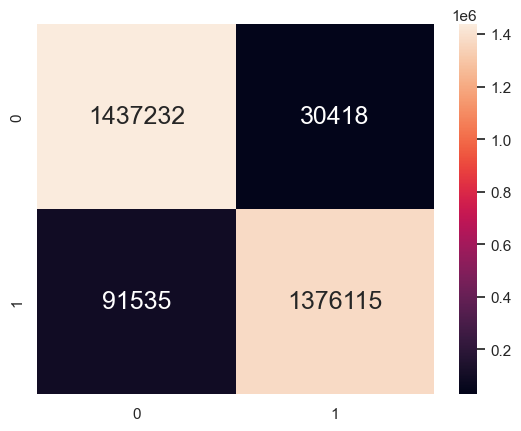

In [35]:
et_pred=et.predict(X)

print('Accuracy:', accuracy_score(y, et_pred))
print('Precision:', precision_score(y, et_pred))
print('Recall:', recall_score(y, et_pred))
print('F1-Score:', f1_score(y, et_pred))

et_acc=accuracy_score(y, et_pred)
et_pre=precision_score(y, et_pred)
et_rec=recall_score(y, et_pred)
et_f1=f1_score(y, et_pred)

fig, ax = plt.subplots()
sb.heatmap(confusion_matrix(y, et_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

Accuracy: 0.9131056450788676
Precision: 0.9383588038762173
Recall: 0.8843014342656628
F1-Score: 0.9105284888087385


<Axes: >

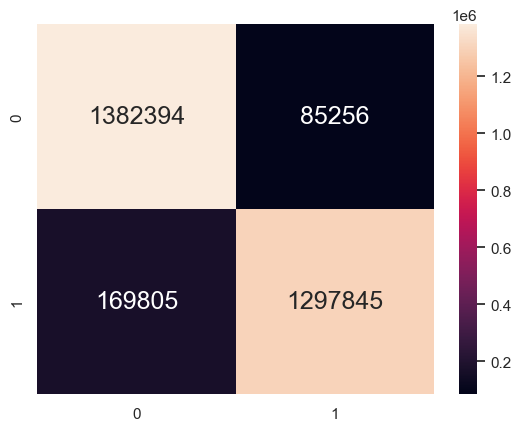

In [36]:
dt_pred=dt.predict(X)

print('Accuracy:', accuracy_score(y, dt_pred))
print('Precision:', precision_score(y, dt_pred))
print('Recall:', recall_score(y, dt_pred))
print('F1-Score:', f1_score(y, dt_pred))

dt_acc=accuracy_score(y, dt_pred)
dt_pre=precision_score(y, dt_pred)
dt_rec=recall_score(y, dt_pred)
dt_f1=f1_score(y, dt_pred)

fig, ax = plt.subplots()
sb.heatmap(confusion_matrix(y, dt_pred), annot=True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

In [37]:
results = {
    'Random Forest': {'accuracy': rf_acc, 'precision': rf_pre, 'recall': rf_rec, 'f1': rf_f1},
    'Logistic Regression': {'accuracy': log_acc, 'precision': log_pre, 'recall': log_rec, 'f1': log_f1},
    'Xgboost': {'accuracy': xgb_acc, 'precision': xgb_pre, 'recall': xgb_rec, 'f1': xgb_f1},
    'Lightgbm': {'accuracy': lgm_acc, 'precision': lgm_pre, 'recall': lgm_rec, 'f1': lgm_f1},
    'Extratrees': {'accuracy': et_acc, 'precision': et_pre, 'recall': et_rec, 'f1': et_f1},
    'Decision Tree': {'accuracy': dt_acc, 'precision': dt_pre, 'recall': dt_rec, 'f1': dt_f1},
}


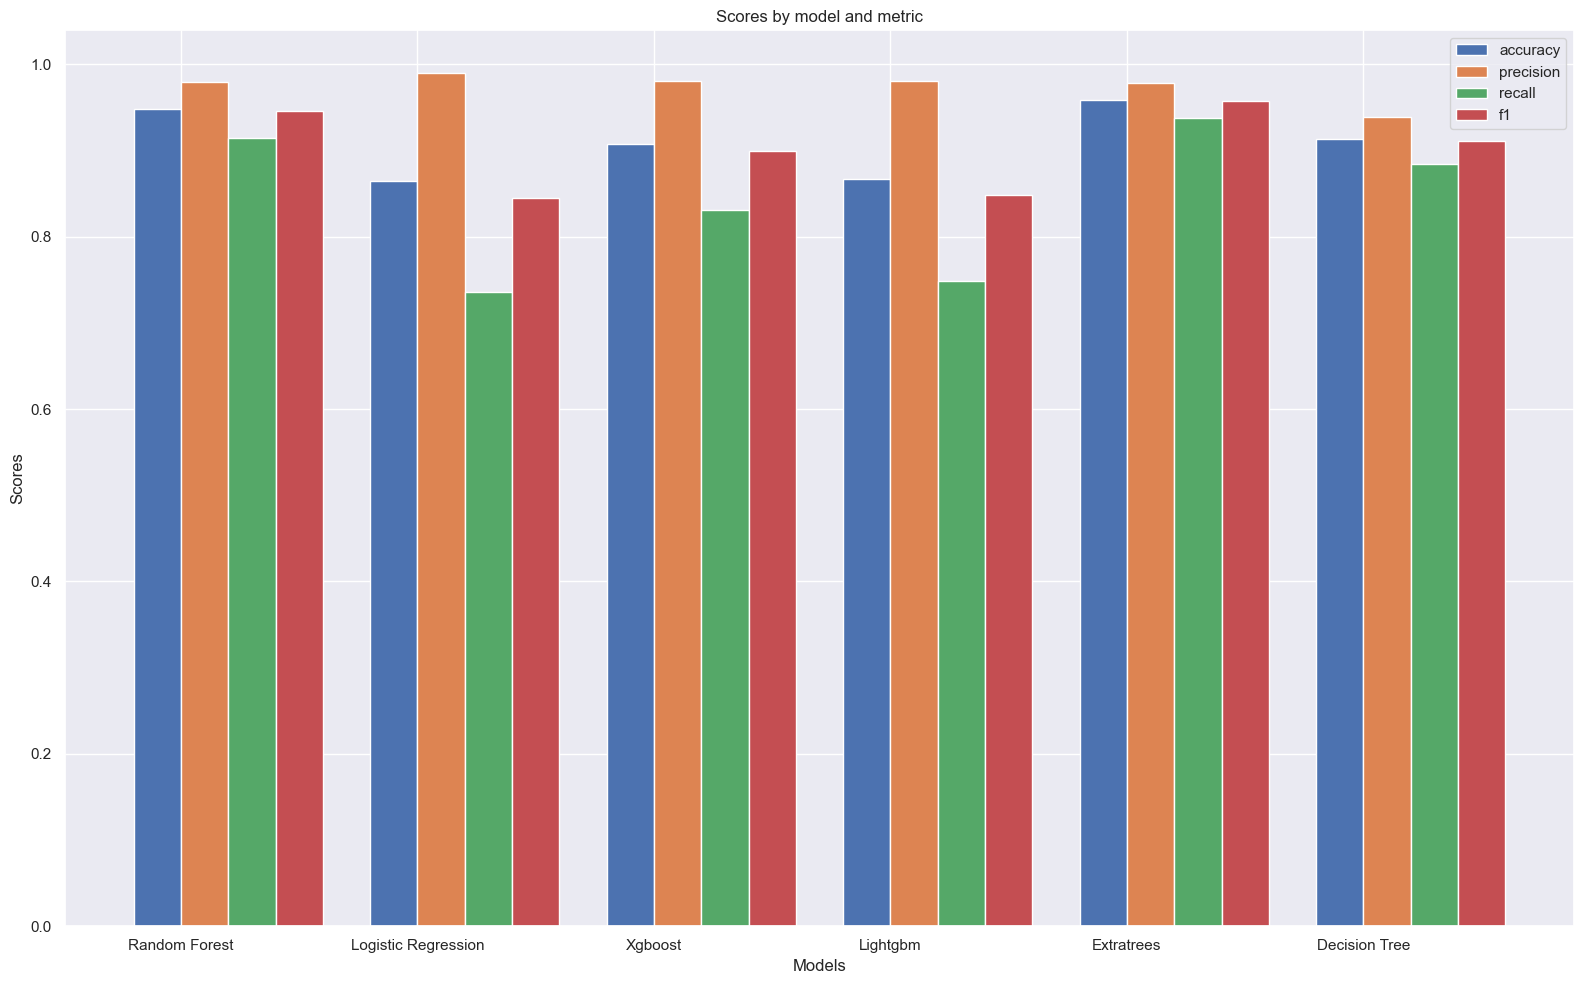

In [38]:
import matplotlib.pyplot as plt
import numpy as np

models = list(results.keys())
metrics = list(results[models[0]].keys())

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 10))  # Adjust the figure size here
for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in models]
    rects = ax.bar(x - width/2 + i*width, values, width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


Extratrees seems to be the best performing model